In [352]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# Combine data on city
pyber = pd.merge(ride,city, on='city', how='left')
# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

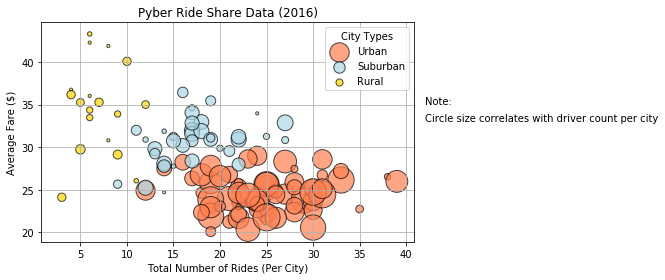

In [353]:
# Obtain the x and y coordinates for each of the three city types

# create group by object by city and ride type
pyber_group = pyber.groupby(by=['type','city'])

# create variable for total rides, average fare, and driver count
rides = pyber_group.ride_id.count()
fare = pyber_group.fare.mean()
drivers = pyber_group.driver_count.mean()

# merge variables into summary dataframe = pd.merge(pyber_group_summary,driver_count, on ['type','city'])
pyber_group_summary = pd.merge(rides,fare, on=['type','city'])
pyber_group_summary = pd.merge(pyber_group_summary,drivers, on=['type','city'])

# replace column names
pyber_group_summary = pyber_group_summary.rename(columns = {'ride_id':'Num_Rides','fare':'Average_Fare','driver_count':
                                                           'Num_Drivers'})

pyber_group_summary.reset_index(inplace=True)


columns = ['city','type','Average_Fare','Num_Rides','Num_Drivers']

# create number of rides per city type
num_rides = pyber_group_summary.loc[:,columns].Num_Rides
num_rides_urban = pyber_group_summary.loc[pyber_group_summary.type=='Urban',columns].Num_Rides
num_rides_rural  = pyber_group_summary.loc[pyber_group_summary.type=='Rural',columns].Num_Rides
num_rides_suburban  = pyber_group_summary.loc[pyber_group_summary.type=='Suburban',columns].Num_Rides


# create average fare per city type
average_fare = pyber_group_summary.loc[:,columns].Average_Fare
average_fare_urban = pyber_group_summary.loc[pyber_group_summary.type=='Urban',columns].Average_Fare
average_fare_rural  = pyber_group_summary.loc[pyber_group_summary.type=='Rural',columns].Average_Fare
average_fare_suburban  = pyber_group_summary.loc[pyber_group_summary.type=='Suburban',columns].Average_Fare


# create number of drivers per city type
num_drivers = pyber_group_summary.loc[:,columns].Num_Drivers
num_drivers_urban = pyber_group_summary.loc[pyber_group_summary.type=='Urban',columns].Num_Drivers
num_drivers_rural  = pyber_group_summary.loc[pyber_group_summary.type=='Rural',columns].Num_Drivers
num_drivers_suburban  = pyber_group_summary.loc[pyber_group_summary.type=='Suburban',columns].Num_Drivers


# Build the scatter plots for each city types
plt.scatter(num_rides_urban, average_fare_urban, marker="o", facecolor = 'coral',edgecolors="black",
                s=num_drivers_urban*10, alpha=0.7)
plt.scatter(num_rides_suburban, average_fare_suburban, marker="o", facecolor = 'lightblue',edgecolors="black",
                 s=num_drivers_suburban*10, alpha=0.7)
plt.scatter(num_rides_rural, average_fare_rural, marker="o", facecolor = 'gold', edgecolors="black",
                 s=num_drivers_rural*10, alpha=0.7)

# Incorporate the other graph properties
plt.title('Pyber Ride Share Data (2016)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid()
plt.tight_layout()

# Create a legend
plt.legend(labels = ['Urban','Suburban','Rural'], title = 'City Types')

# Incorporate a text label regarding circle size

plt.text(42,35,'Note:')
plt.text(42,33,'Circle size correlates with driver count per city')

# Save Figure
plt.savefig('Images/Pyber Ride Share Data')
# Show Plot
plt.show()

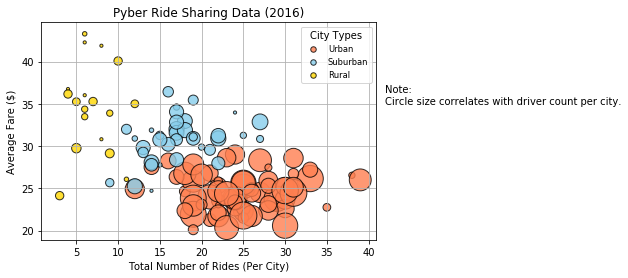

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

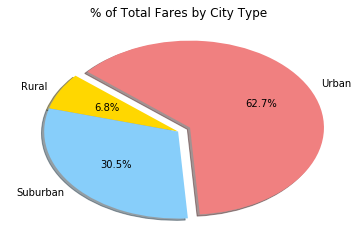

In [354]:
# Calculate Type Percents

# create group by object by city and ride type
pyber_type = pyber.groupby(by=['type'])
fare_type = pyber_type.fare.sum()
fare_type

# Build Pie Chart

# Labels for the sections of our pie chart correspond to the index 
labels = fare_type.index

# The values of each section of the pie chart corresponde to total fares per section
sizes = fare_type

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('Images/% of Total Fares by City Type')

# Show Figure
plt.show()

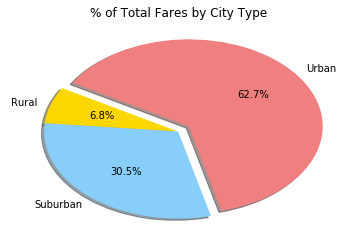

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

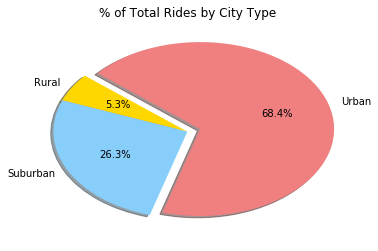

In [355]:
# Calculate Ride Percents
# use group by object from previous exercise
rides_type = pyber_type.ride_id.count()
rides_type

# Build Pie Chart

# Labels for the sections of our pie chart correspond to the index 
labels = rides_type.index

# The values of each section of the pie chart corresponde to total fares per section
sizes = rides_type

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes,  labels=labels, colors=colors,explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Images/% of Rides by City Type')

# Show Figure
plt.show()

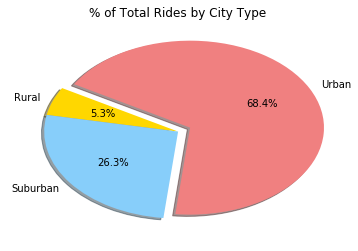

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

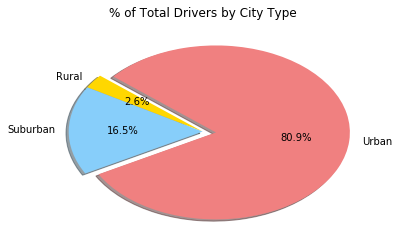

In [356]:
# Calculate Driver Percents
# use drivers object from previous exercise, which was aggregated by city, type
# and further aggregate by type
drivers_type = drivers.groupby(by=['type']).sum()


# Build Pie Chart

# Labels for the sections of our pie chart correspond to the index 
labels = drivers_type.index

# The values of each section of the pie chart corresponde to total fares per section
sizes = drivers_type

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes,  labels=labels, colors=colors,explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('Images/% of Rides Drivers by City Type')

# Show Figure
plt.show()

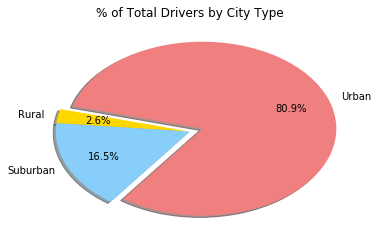

In [6]:
# Show Figure
plt.show()